<a href="https://colab.research.google.com/github/fauziah-azzhr/PertemuanKedua/blob/main/TugasModelWarna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload minimal 3 gambar dengan pencahayaan berbeda


Saving fotogelap.jpg to fotogelap.jpg
Saving fotonormal.jpg to fotonormal.jpg
Saving fototerang.jpg to fototerang (1).jpg


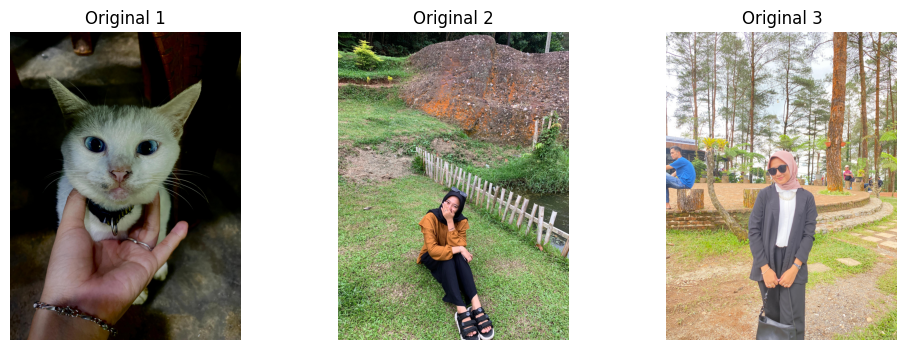


================ IMAGE 1 ================


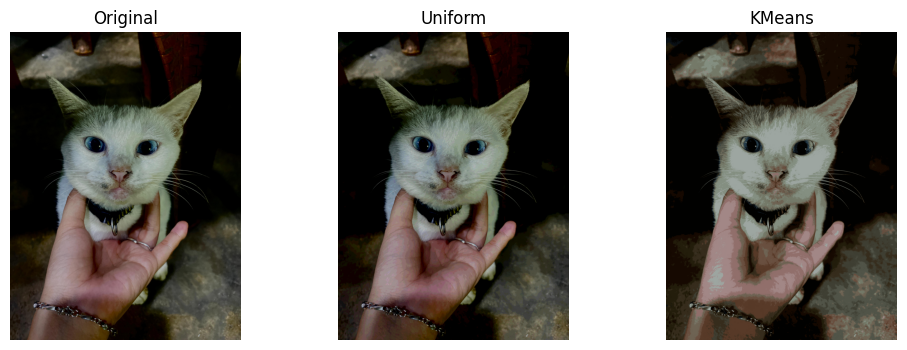

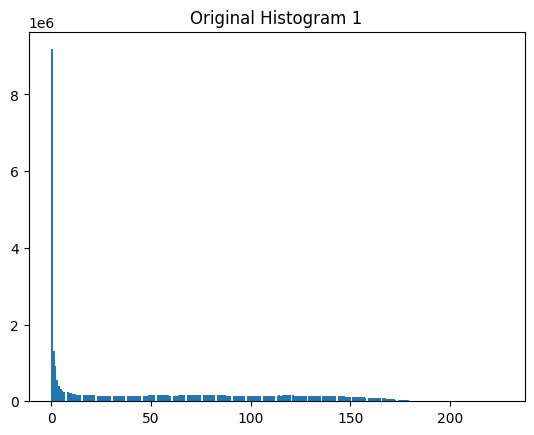

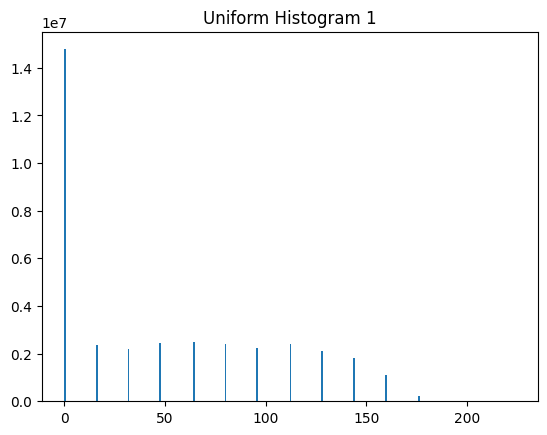

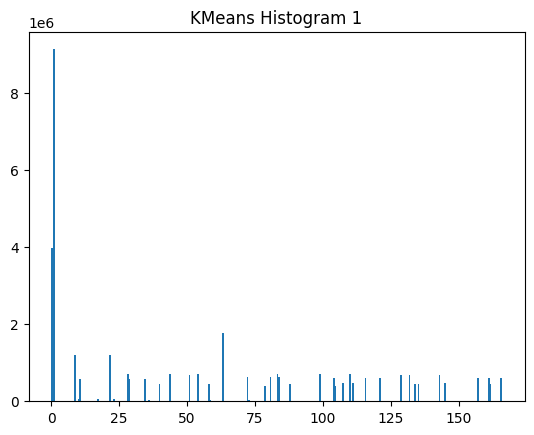

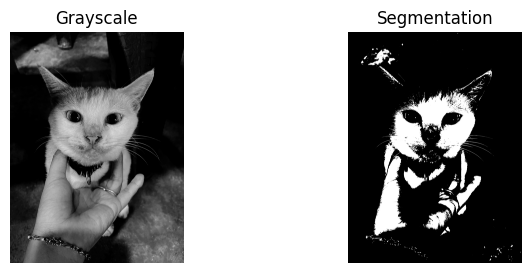

MEMORY USAGE:
Original: 36578304 bytes
Uniform: 36578304 bytes
KMeans: 36578304 bytes
Compression Ratio (Uniform): 1.00
Compression Ratio (KMeans): 1.00

COMPUTATION TIME:
Gray: 0.010617 sec
HSV: 0.048139 sec
LAB: 0.081024 sec

SAMPLE MATRIX (5x5):
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

SAMPLE VECTOR (10 elements):
[0 0 0 0 0 0 0 0 0 0]

================ IMAGE 2 ================


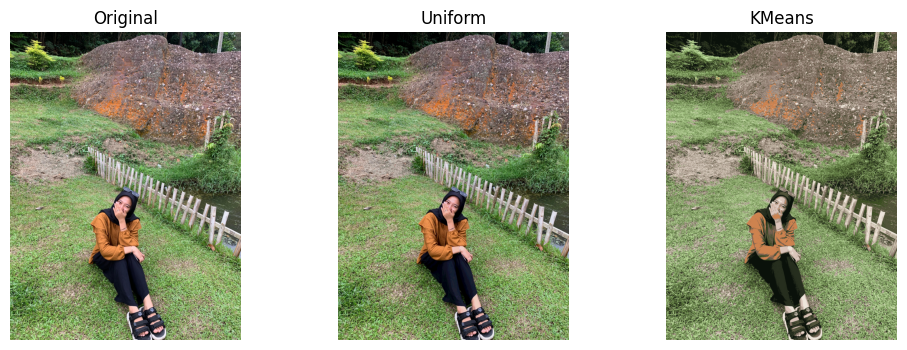

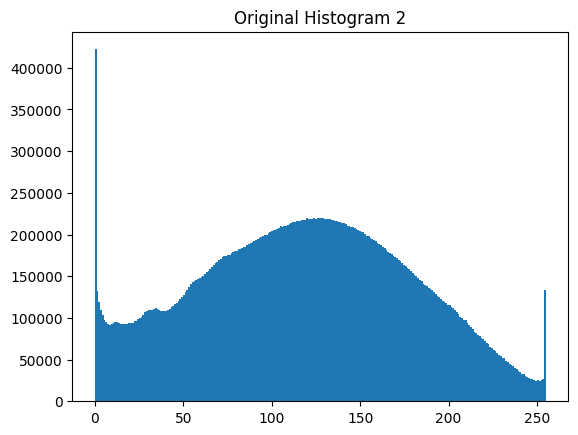

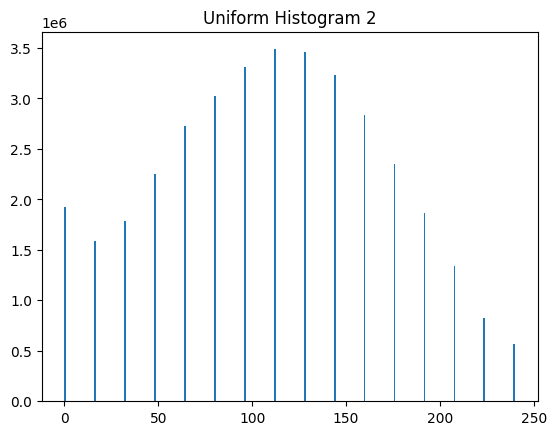

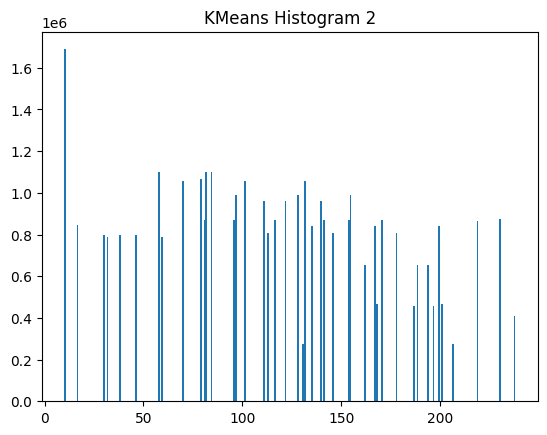

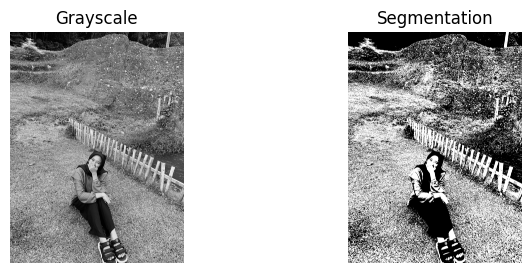

MEMORY USAGE:
Original: 36578304 bytes
Uniform: 36578304 bytes
KMeans: 36578304 bytes
Compression Ratio (Uniform): 1.00
Compression Ratio (KMeans): 1.00

COMPUTATION TIME:
Gray: 0.006398 sec
HSV: 0.049182 sec
LAB: 0.090617 sec

SAMPLE MATRIX (5x5):
[[37 34 30 30 31]
 [38 35 32 31 31]
 [40 37 34 33 32]
 [40 38 37 35 33]
 [39 38 38 36 33]]

SAMPLE VECTOR (10 elements):
[37 34 30 30 31 28 20 13  7  9]

================ IMAGE 3 ================


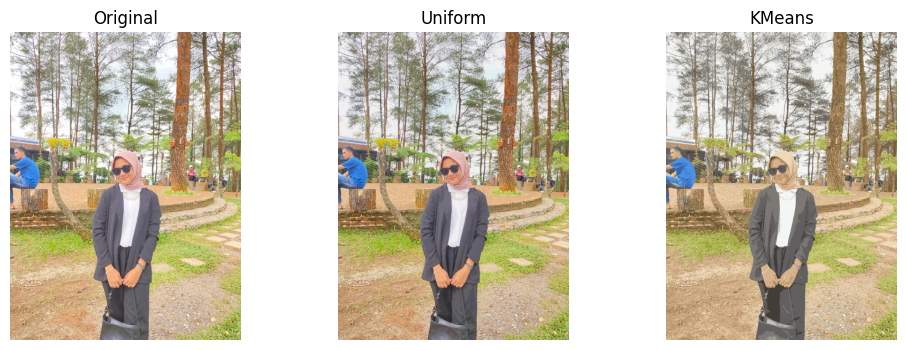

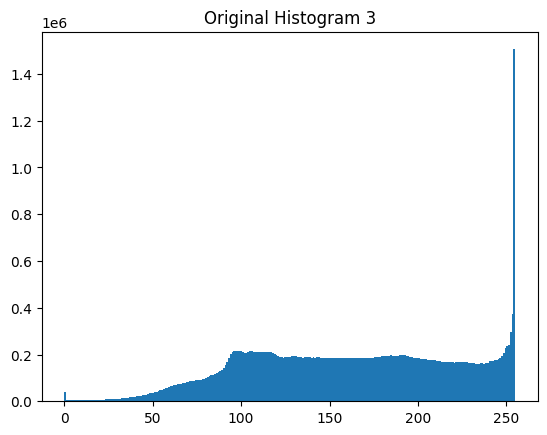

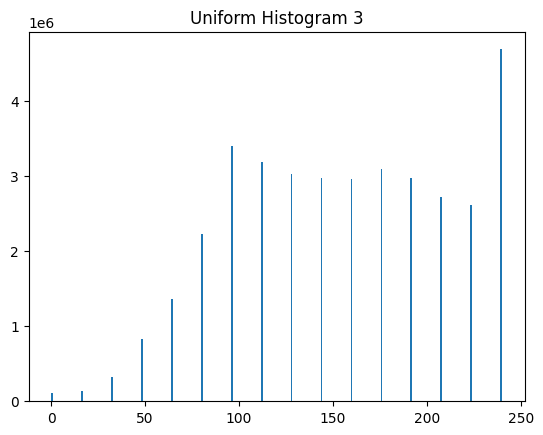

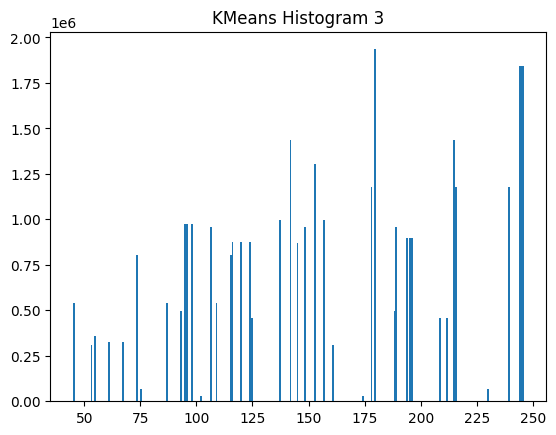

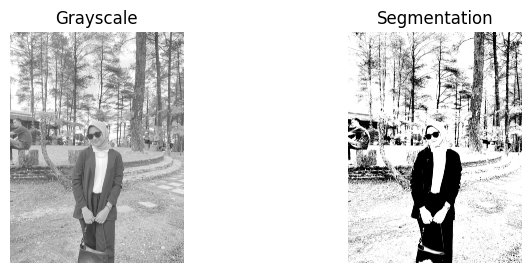

MEMORY USAGE:
Original: 36578304 bytes
Uniform: 36578304 bytes
KMeans: 36578304 bytes
Compression Ratio (Uniform): 1.00
Compression Ratio (KMeans): 1.00

COMPUTATION TIME:
Gray: 0.007746 sec
HSV: 0.046975 sec
LAB: 0.094426 sec

SAMPLE MATRIX (5x5):
[[255 254 255 255 255]
 [244 255 255 249 247]
 [235 250 255 247 248]
 [240 235 239 251 255]
 [250 237 231 238 247]]

SAMPLE VECTOR (10 elements):
[255 254 255 255 255 249 248 253 254 255]

=== SELESAI ===


In [2]:
# ============================================
# PROYEK MINI: KONVERSI & KUANTISASI WARNA
# ============================================

# 1. IMPORT LIBRARY
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

# 2. UPLOAD GAMBAR
print("Upload minimal 3 gambar dengan pencahayaan berbeda")
uploaded = files.upload()

image_paths = list(uploaded.keys())

# 3. FUNGSI-FUNGSI

# Konversi warna
def convert_color_spaces(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    return gray, hsv, lab

# Kuantisasi Uniform
def uniform_quantization(img, levels=16):
    step = 256 // levels
    quantized = (img // step) * step
    return quantized.astype(np.uint8)

# Kuantisasi Non-Uniform (KMeans)
def kmeans_quantization(img, K=16):
    Z = img.reshape((-1,3))
    Z = np.float32(Z)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    _, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    center = np.uint8(center)
    res = center[label.flatten()]
    return res.reshape(img.shape)

# Segmentasi sederhana
def simple_segmentation(gray):
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    return thresh

# Histogram
def plot_histogram(img, title):
    plt.hist(img.ravel(), bins=256)
    plt.title(title)
    plt.show()

# Hitung memori
def calculate_memory(img):
    return img.nbytes

# Waktu komputasi
def measure_time(func, img):
    start = time.time()
    func(img)
    end = time.time()
    return end - start

# 4. PROSES UTAMA
images = []
converted_images = []
results = []

# Membaca gambar
for path in image_paths:
    img = cv2.imread(path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img_rgb)

# Tampilkan gambar asli
plt.figure(figsize=(12,4))
for i, img in enumerate(images):
    plt.subplot(1, len(images), i+1)
    plt.imshow(img)
    plt.title(f'Original {i+1}')
    plt.axis('off')
plt.show()

# Proses tiap gambar
for i, img in enumerate(images):
    print(f"\n================ IMAGE {i+1} ================")

    # Konversi warna
    gray, hsv, lab = convert_color_spaces(img)
    converted_images.append((gray, hsv, lab))

    # Kuantisasi
    uq = uniform_quantization(img, 16)
    nq = kmeans_quantization(img, 16)
    results.append((uq, nq))

    # ================= VISUALISASI =================
    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.imshow(img)
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(uq)
    plt.title("Uniform")
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(nq)
    plt.title("KMeans")
    plt.axis('off')

    plt.show()

    # ================= HISTOGRAM =================
    plot_histogram(img, f'Original Histogram {i+1}')
    plot_histogram(uq, f'Uniform Histogram {i+1}')
    plot_histogram(nq, f'KMeans Histogram {i+1}')

    # ================= SEGMENTASI =================
    seg = simple_segmentation(gray)

    plt.figure(figsize=(8,3))
    plt.subplot(1,2,1)
    plt.imshow(gray, cmap='gray')
    plt.title('Grayscale')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(seg, cmap='gray')
    plt.title('Segmentation')
    plt.axis('off')

    plt.show()

    # ================= MEMORI =================
    original_mem = calculate_memory(img)
    uq_mem = calculate_memory(uq)
    nq_mem = calculate_memory(nq)

    print("MEMORY USAGE:")
    print(f"Original: {original_mem} bytes")
    print(f"Uniform: {uq_mem} bytes")
    print(f"KMeans: {nq_mem} bytes")
    print(f"Compression Ratio (Uniform): {original_mem/uq_mem:.2f}")
    print(f"Compression Ratio (KMeans): {original_mem/nq_mem:.2f}")

    # ================= WAKTU =================
    t_gray = measure_time(lambda x: cv2.cvtColor(x, cv2.COLOR_RGB2GRAY), img)
    t_hsv = measure_time(lambda x: cv2.cvtColor(x, cv2.COLOR_RGB2HSV), img)
    t_lab = measure_time(lambda x: cv2.cvtColor(x, cv2.COLOR_RGB2LAB), img)

    print("\nCOMPUTATION TIME:")
    print(f"Gray: {t_gray:.6f} sec")
    print(f"HSV: {t_hsv:.6f} sec")
    print(f"LAB: {t_lab:.6f} sec")

    # ================= MATRIKS =================
    print("\nSAMPLE MATRIX (5x5):")
    print(gray[:5, :5])

    print("\nSAMPLE VECTOR (10 elements):")
    print(gray.flatten()[:10])

print("\n=== SELESAI ===")